# TME 6 - Approches interprétables "by design"

## 1. Mesures de discrimination


### 1.1 Courbes des différentes mesures de discrimination


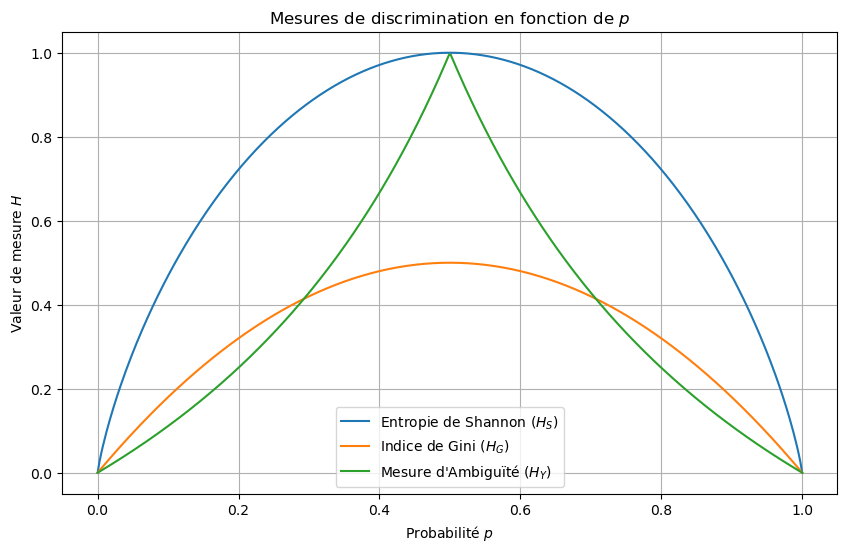

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def shannon_entropy(p):
    # Éviter les valeurs de log(0) en définissant l'entropie de 0 log(0) comme 0
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p)) if p != 0 and p != 1 else 0


def gini_index(p):
    return 2 * p * (1 - p)


def ambiguity_measure(p):
    # Éviter les valeurs de log(0) et les divisions par zéro
    if p > 1 / 2:
        return np.log2(2) * (1 - p) / p
    else:
        return np.log2(2) * p / (1 - p)


# Générer des valeurs de p entre 0 et 1
p_values = np.linspace(0, 1, 400)

# Calculer les valeurs des mesures pour chaque p
hs_values = [shannon_entropy(p) for p in p_values]  # Entropie de Shannon
hg_values = [gini_index(p) for p in p_values]  # Indice de Gini
hy_values = [ambiguity_measure(p) for p in p_values]  # Mesure d'ambiguïté

# Création du graphique
plt.figure(figsize=(10, 6))

plt.plot(p_values, hs_values, label="Entropie de Shannon ($H_S$)")
plt.plot(p_values, hg_values, label="Indice de Gini ($H_G$)")
plt.plot(p_values, hy_values, label="Mesure d'Ambiguïté ($H_Y$)")

plt.title("Mesures de discrimination en fonction de $p$")
plt.xlabel("Probabilité $p$")
plt.ylabel("Valeur de mesure $H$")
plt.legend()
plt.grid(True)
plt.show()

### 1.2. Comparatif des mesures de discrimitation


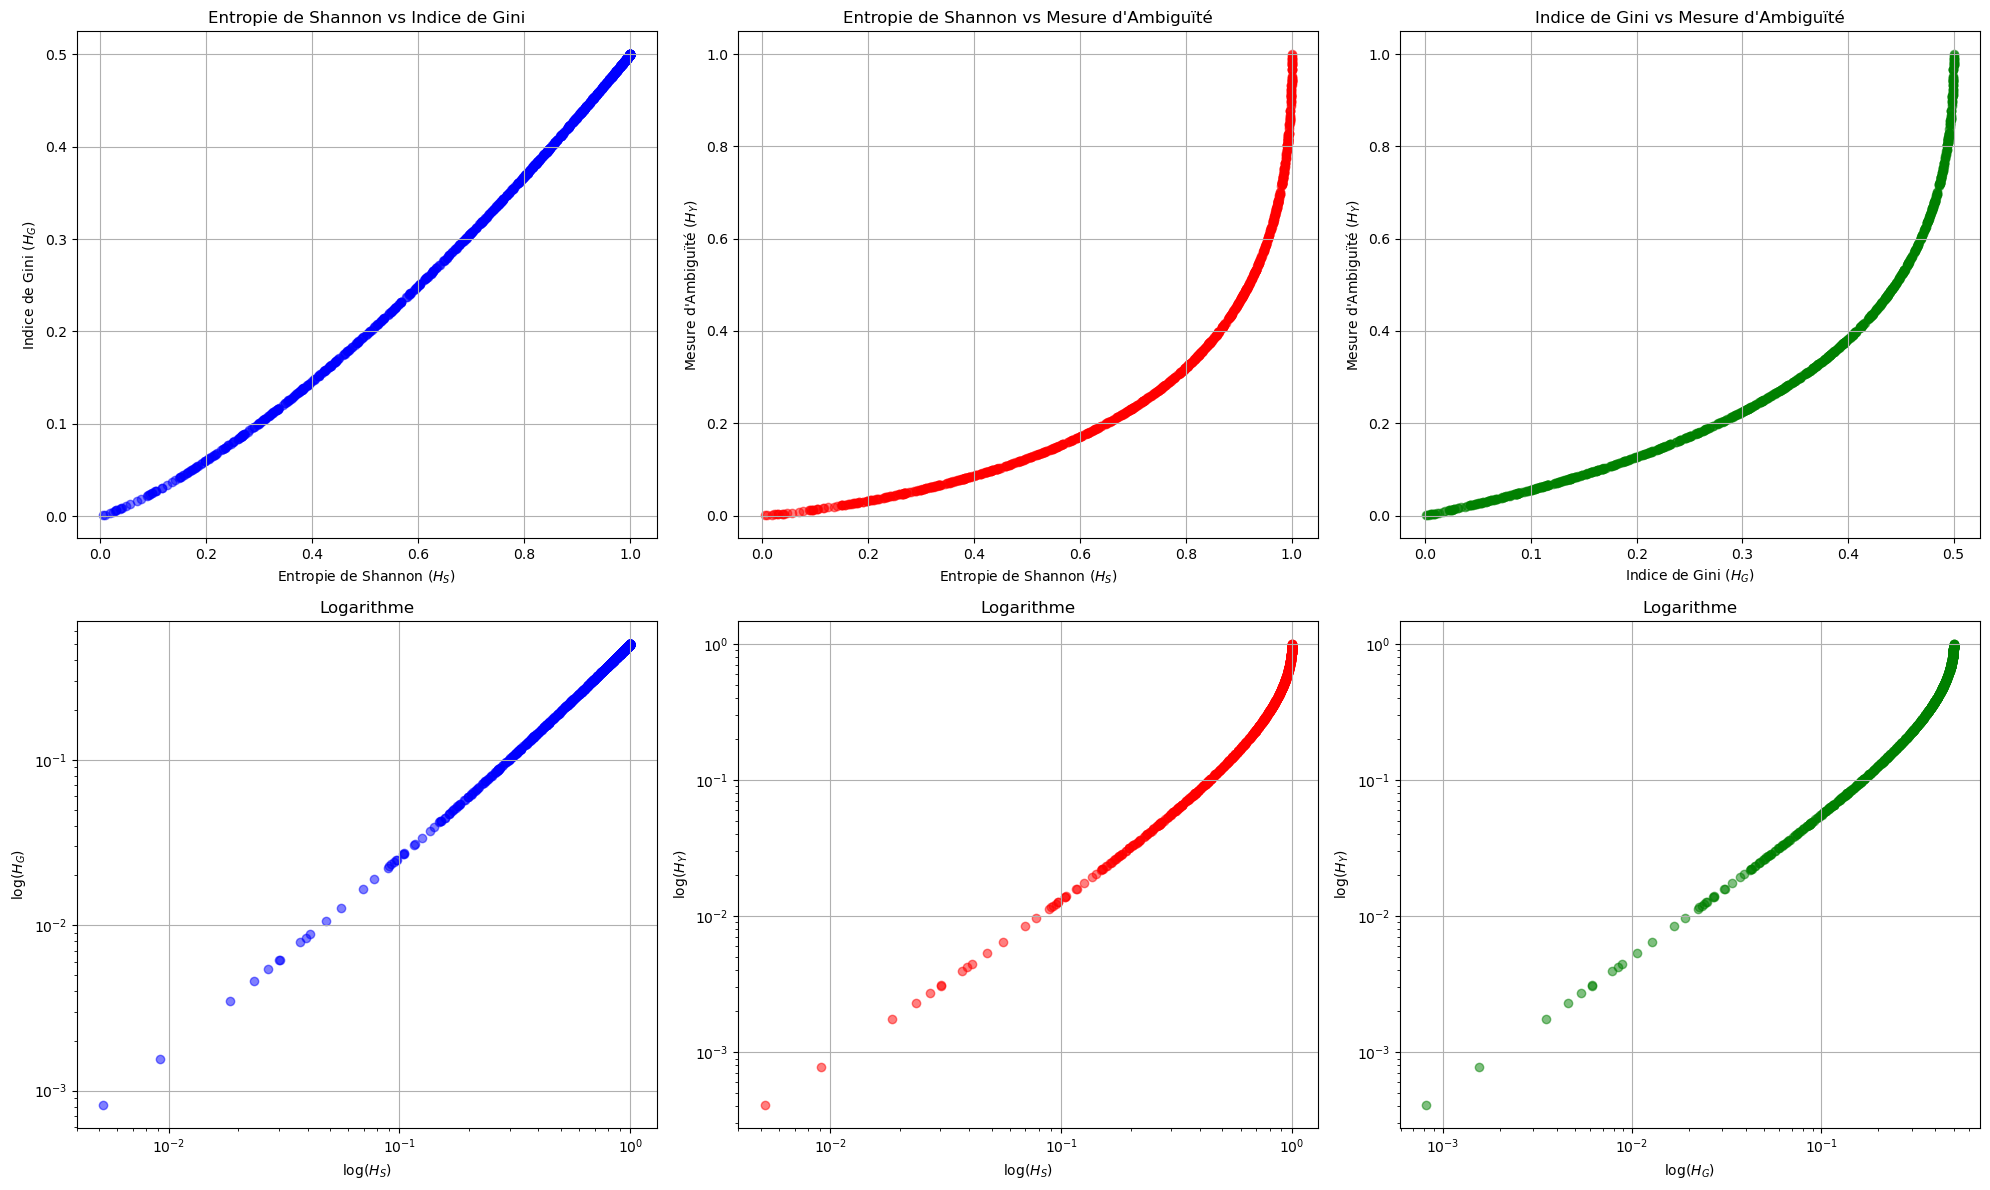

In [2]:
import random

# Nombre de tirages aléatoires
num_samples = 1000

# Tirer des valeurs aléatoires de p et calculer les mesures correspondantes
random_p_values = [random.uniform(0, 1) for _ in range(num_samples)]
measures = [
    (shannon_entropy(p), gini_index(p), ambiguity_measure(p)) for p in random_p_values
]
hs_samples, hg_samples, hy_samples = zip(*measures)

# Figures
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
# Shannon vs Gini
axs[0, 0].scatter(hs_samples, hg_samples, color="blue", alpha=0.5)
axs[0, 0].set_title("Entropie de Shannon vs Indice de Gini")
axs[0, 0].set_xlabel("Entropie de Shannon ($H_S$)")
axs[0, 0].set_ylabel("Indice de Gini ($H_G$)")
axs[0, 0].grid(True)

axs[1, 0].scatter(hs_samples, hg_samples, color="blue", alpha=0.5)
axs[1, 0].set_title("Logarithme")
axs[1, 0].set_xlabel("$\log(H_S)$")
axs[1, 0].set_ylabel("$\log(H_G)$")
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].grid(True)

# Shannon vs Ambiguïté
axs[0, 1].scatter(hs_samples, hy_samples, color="red", alpha=0.5)
axs[0, 1].set_title("Entropie de Shannon vs Mesure d'Ambiguïté")
axs[0, 1].set_xlabel("Entropie de Shannon ($H_S$)")
axs[0, 1].set_ylabel("Mesure d'Ambiguïté ($H_Y$)")
axs[0, 1].grid(True)

axs[1, 1].scatter(hs_samples, hy_samples, color="red", alpha=0.5)
axs[1, 1].set_title("Logarithme")
axs[1, 1].set_xlabel("$\log(H_S)$")
axs[1, 1].set_ylabel("$\log(H_Y)$")
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].grid(True)

# Gini vs Ambiguïté
axs[0, 2].scatter(hg_samples, hy_samples, color="green", alpha=0.5)
axs[0, 2].set_title("Indice de Gini vs Mesure d'Ambiguïté")
axs[0, 2].set_xlabel("Indice de Gini ($H_G$)")
axs[0, 2].set_ylabel("Mesure d'Ambiguïté ($H_Y$)")
axs[0, 2].grid(True)

axs[1, 2].scatter(hg_samples, hy_samples, color="green", alpha=0.5)
axs[1, 2].set_title("Logarithme")
axs[1, 2].set_xlabel("$\log(H_G)$")
axs[1, 2].set_ylabel("$\log(H_Y)$")
axs[1, 2].set_xscale("log")
axs[1, 2].set_yscale("log")
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()


### 1.3. Étude des résultats obtenus


In [3]:
print(
    f"Corrélation entre l'entropie de Shannon et l'indice de Gini      : {np.corrcoef(hs_samples, hg_samples)[0,1]:.4f}"
)
print(
    f"Corrélation entre l'entropie de Shannon et la mesure d'ambiguïté : {np.corrcoef(hs_samples, hy_samples)[0,1]:.4f}"
)
print(
    f"Corrélation entre l'indice de Gini et la mesure d'ambiguïté      : {np.corrcoef(hg_samples, hy_samples)[0,1]:.4f}"
)

Corrélation entre l'entropie de Shannon et l'indice de Gini      : 0.9962
Corrélation entre l'entropie de Shannon et la mesure d'ambiguïté : 0.8786
Corrélation entre l'indice de Gini et la mesure d'ambiguïté      : 0.9077


Les graphiques ci-dessus présentent des comparaisons deux à deux des mesures de discrimination basées sur des échantillons de valeurs $p$ tirées aléatoirement. Chaque point sur les graphiques représente une distribution de probabilité spécifique (un tirage pour $p$), et ses coordonnées correspondent aux valeurs de deux mesures différentes. En examinant ces courbes, on peut déduire les relations entre les différentes mesures :

- **Indice de Gini vs entropie de Shannon** : ces deux mesures présentent une corrélation positive très élevée ($> 0.99$). Ainsi, on observe que pour l'indice de Gini et l'entropie de Shannon, la courbe est quasiment linéaire, suggérant ainsi une relation de proportionnalité étroite entre ces deux mesures ;
- **Entropie de Shannon vs mesure d'ambiguïté** : ces deux mesures affichent une corrélation légèrement moins élevée que la précédente, mais elle reste très significative, indiquant une forte corrélation positive. La courbe ressemble à une courbe exponentielle, ce qui signifie que la mesure d'ambiguïté augmente de manière exponentielle par rapport à l'entropie de Shannon ;
- **Indice de Gini vs mesure d'ambiguïté** : une fois de plus, ces deux mesures présentent une forte corrélation positive, et la courbe est similaire à celle précédemment mentionnée, sans surprise.

Même sans calculer le coefficient de corrélation de Pearson, nous pouvons conclure que ces mesures sont très fortement corrélées, car les points ne sont pas dispersés. On identifie clairement des courbes, indiquant une relation claire entre les mesures. De plus, nous pourrions constater que l'indice de Gini et l'entropie de Shannon resteraient fortement corrélés même en augmentant le nombre de classes. Cependant, dans ce cas, il y aurait une dispersion plus marquée lors de la comparaison des deux premières mesures avec la mesure d'ambiguïté.


## 2. Arbres de décision en présence de données symboliques

### 2.1. Arbre de décision simple sur les données `digits`


In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# Charger les données 'digits'
digits = datasets.load_digits()

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.3, random_state=42
)

# Construire l'arbre de décision en utilisant l'entropie de Shannon comme critère
tree_digits = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_digits.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = tree_digits.predict(X_test)

# Évaluer la précision de l'arbre de décision
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")


Accuracy: 88.3333%


L'arbre de décision construit sur les données `digits` en utilisant l'entropie de Shannon comme critère a une précision d'environ 88.3% sur l'ensemble de test. Cela signifie que l'arbre de décision classe correctement les images environ 88.3% du temps, ce qui est une performance relativement bonne pour un modèle simple sans réglage fin.


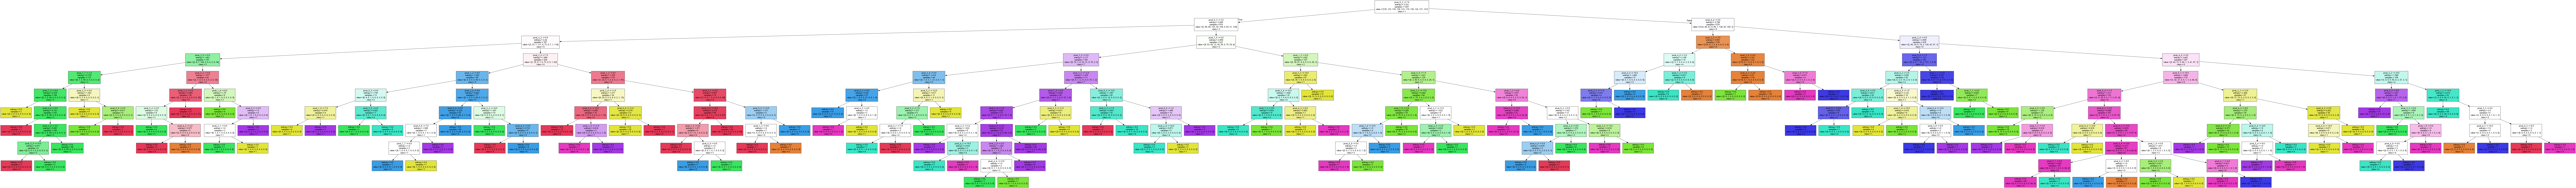

In [5]:
import os
from IPython.display import Image

# Génération du fichier .dot représentant l'arbre
out_file = "tree_digits"
dot_file = tree.export_graphviz(
    tree_digits,
    out_file=out_file + ".dot",
    feature_names=digits.feature_names,
    class_names=list(map(str, digits.target_names)),
    filled=True,
)

# Transformation du fichier .dot en fichier .png
os.system(f"dot -T png {out_file}.dot -o {out_file}.png")

# Afficher l'arbre obtenu
Image(filename=out_file + ".png")

Par ailleurs, l'arbre est très complexe, des outils d'explicabilité seraient bienvenues.


### 2.2. Arbre de décision sur les données `elections.csv`


In [6]:
import tarfile

# Extraire le fichier
PATH = "."
with tarfile.open(f"{PATH}/data.tgz", "r:gz") as tar:
    tar.extractall(path=f"{PATH}/")

# Vérifier si le fichier 'elections.csv' est dans le répertoire extrait
extracted_files = os.listdir(f"{PATH}/data")
"elections.csv" in extracted_files


True

In [7]:
import pandas as pd

# Charger les données
elections_data_path = f"{PATH}/data/elections.csv"
elections_data = pd.read_csv(elections_data_path)
elections_data

,Adresse,Majeur?,Nationalite,Label
0,Paris,oui,Francais,1
1,Paris,non,Francais,-1
2,Montpellier,oui,Italien,1
3,Paris,oui,Suisse,-1
4,Strasbourg,non,Italien,-1
5,Strasbourg,non,Francais,-1
6,Strasbourg,oui,Francais,1
7,Montpellier,oui,Suisse,-1


In [8]:
# Appliquer le one hot encoding
elections_encoded = pd.get_dummies(elections_data)
elections_encoded


,Label,Adresse_Montpellier,Adresse_Paris,Adresse_Strasbourg,Majeur?_non,Majeur?_oui,Nationalite_Francais,Nationalite_Italien,Nationalite_Suisse
0,1,0,1,0,0,1,1,0,0
1,-1,0,1,0,1,0,1,0,0
2,1,1,0,0,0,1,0,1,0
3,-1,0,1,0,0,1,0,0,1
4,-1,0,0,1,1,0,0,1,0
5,-1,0,0,1,1,0,1,0,0
6,1,0,0,1,0,1,1,0,0
7,-1,1,0,0,0,1,0,0,1


In [9]:
# Séparer les caractéristiques (features) et les étiquettes (labels)
X = elections_encoded.drop("Label", axis=1)
y = elections_encoded["Label"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Construire l'arbre de décision en utilisant l'entropie comme critère
tree_elections = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_elections.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_elections = tree_elections.predict(X_test)

# Évaluer la précision de l'arbre de décision
accuracy_elections = accuracy_score(y_test, y_pred_elections)
print(f"Accuracy: {accuracy_elections * 100:.4f}%")

Accuracy: 100.0000%


L'arbre de décision, construit sur les données `elections.csv` et utilisant l'entropie de Shannon comme critère, a une précision de 100% sur l'ensemble de test. Cela signifie que, pour cet ensemble de données particulier et pour l'ensemble de test choisi, le modèle a parfaitement classé tous les échantillons. Cependant, une précision de 100% peut indiquer de l'_overfitting_, qui ici est du à la taille de notre ensemble de données (n=8).

Nous pouvoons également le visualiser :


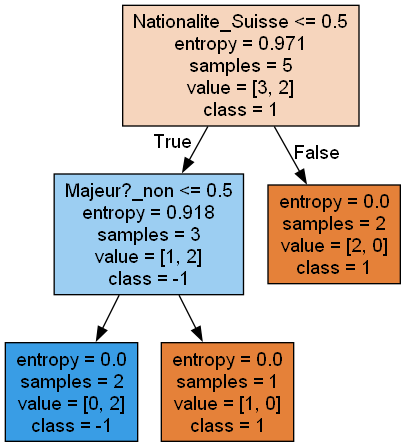

In [10]:
# Génération du fichier .dot représentant l'arbre
out_file = "tree_elections"
dot_file = tree.export_graphviz(
    tree_elections,
    out_file=out_file + ".dot",
    feature_names=X.columns.to_list(),
    class_names=list(map(str, y.unique())),
    filled=True,
)

# Transformation du fichier .dot en fichier .png
os.system(f"dot -T png {out_file}.dot -o {out_file}.png")

# Afficher l'arbre obtenu
Image(filename=out_file + ".png")

### 2.3 Algorithme de construction d’arbres de décision en présence de données symboliques


In [11]:
from collections import Counter


class SymbolicDecisionTree:
    def __init__(self):
        self.tree = None
        self.data = None

    class Node:
        def __init__(
            self,
            feature=None,
            value=None,
            true_branch=None,
            false_branch=None,
            result=None,
            entropy=None,
        ):
            self.feature = feature
            self.value = value
            self.true_branch = true_branch
            self.false_branch = false_branch
            self.result = result
            self.entropy = entropy

    def fit(self, X, y):
        training_data = pd.concat([X, y], axis=1)  # Combine features and labels
        self.data = training_data
        self.tree = self.build_tree(training_data)

    def predict(self, X):
        predictions = [self.predict_single_entry(entry) for _, entry in X.iterrows()]
        return predictions

    def predict_xai(self, entry):
        explanation, _ = self.trace_tree(entry, self.tree, explanation=[])
        return explanation

    def build_tree(self, data):
        # If there's no data, or if all targets are the same, return a leaf node with 
        # the result
        if len(data) == 0:
            return self.Node()

        current_uncertainty = self.gini(data.iloc[:, -1])
        # print(data.iloc[:, -1])
        best_gain = 0
        best_criteria = None
        best_sets = None

        feature_count = len(data.columns) - 1  # number of attributes

        for col in range(feature_count):  # for each feature
            feature_values = data.iloc[:, col].unique()  # unique values
            for val in feature_values:  # for each value
                partitioned_data = self.partition(data, data.columns[col], val)

                # Information gain
                p = float(partitioned_data[0].shape[0]) / data.shape[0]
                gain = (
                    current_uncertainty
                    - p * self.gini(partitioned_data[0].iloc[:, -1])
                    - (1 - p) * self.gini(partitioned_data[1].iloc[:, -1])
                )

                if (
                    gain > best_gain
                    and len(partitioned_data[0]) > 0
                    and len(partitioned_data[1]) > 0
                ):
                    best_gain = gain
                    best_criteria = (data.columns[col], val)
                    best_sets = partitioned_data

        if best_gain > 0:
            true_branch = self.build_tree(best_sets[0])
            false_branch = self.build_tree(best_sets[1])
            return self.Node(
                feature=best_criteria[0],
                value=best_criteria[1],
                true_branch=true_branch,
                false_branch=false_branch,
                entropy=current_uncertainty,
            )
        else:
            # We're at a leaf, determine the outcome
            outcome = data.iloc[:, -1].value_counts().idxmax()  # most frequent class
            return self.Node(result=outcome, entropy=current_uncertainty)

    def predict_single_entry(self, entry):
        node = self.tree
        while node.result is None:
            if entry[node.feature] == node.value:
                node = node.true_branch
            else:
                node = node.false_branch
        return node.result

    def trace_tree(self, entry, node, explanation):
        if node.result is not None:
            return explanation, node.result

        if entry[node.feature] == node.value:
            explanation.append(f"{node.feature} == {node.value}")
            return self.trace_tree(entry, node.true_branch, explanation)
        else:
            explanation.append(f"{node.feature} != {node.value}")
            return self.trace_tree(entry, node.false_branch, explanation)

    def partition(self, data, feature, value):
        true_data = data[data[feature] == value]
        false_data = data[data[feature] != value]
        return (true_data, false_data)

    def gini(self, labels):
        impurity = 1
        label_counts = Counter(labels)
        for label in label_counts:
            prob_of_label = label_counts[label] / float(len(labels))
            impurity -= prob_of_label**2
        return impurity

    def display_tree(self, node=None, indent="", branch=""):
        """
        Visualise la structure arborescente de l'arbre dans un format clair et organisé.

        Format de sortie :
        "├──" indique un nœud qui confirme la condition.
        "└──" indique un nœud qui ne confirme pas la condition.
        Les feuilles affichent le résultat de la classe.
        Les nœuds internes affichent le critère de décision et son entropie.

        Exemple :
        feature_name1 == feature_value1? (Entropy = 0.1234)
        ├── Class : Class_A
        └── feature_name2 == feature_value2? (Entropy = 0.5678)
            ├── Class : Class_B
            └── Class : Class_C

        Dans cet exemple :
        - Si feature_name1 == feature_value1, l'arbre de décision le classe comme 
        'Class_A'.
        - Sinon, il vérifie si feature_name2 == feature_value2 ; si c'est vrai, il est 
        classé comme 'Class_B', et si c'est faux, il est classé comme 'Class_C'.
        """

        if node is None:
            node = self.tree

        # Base case: if it's a leaf node, print the result and return
        if node.result is not None:
            print(f"{indent}{branch}Class: {node.result}")
            return

        # Print the criterion for the current node
        print(
            f"{indent}{branch}{node.feature} == {node.value}? (Entropy = {node.entropy:.4f})"
        )

        # Recursive case: print the true and false branches
        new_indent = indent + ("│   " if branch == "├── " else "    ")

        # For true branch, use '├──'
        self.display_tree(node.true_branch, new_indent, "├── ")

        # For false branch, use '└──'
        self.display_tree(node.false_branch, new_indent, "└── ")


# Séparer les caractéristiques et les étiquettes
election_data = pd.read_csv(elections_data_path)
X = election_data.drop("Label", axis=1)
y = election_data["Label"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialiser et entraîner l'arbre de décision symbolique
tree_xai = SymbolicDecisionTree()
tree_xai.fit(X_train, y_train)

# Évaluer la précision de l'arbre de décision
predictions = tree_xai.predict(X_test)
accuracy = sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {accuracy * 100:.4f}%")

Accuracy: 100.0000%


In [12]:
# Visualisation
tree_xai.display_tree()


Nationalite == Suisse? (Entropy = 0.4800)
    ├── Class: -1
    └── Majeur? == oui? (Entropy = 0.4444)
        ├── Class: 1
        └── Class: -1


On retrouve le même arbre simple que précédemment, mais qui comprend des données symboliques.


### 2.4. Explication


In [13]:
# Sélectionner un échantillon de données pour l'explication
sample = X.iloc[0]  # nous prenons le premier échantillon pour l'exemple

# Obtenir l'explication de la prédiction pour cet échantillon
explanation = tree_xai.predict_xai(sample)
explanation

['Nationalite != Suisse', 'Majeur? == oui']

Le premier individu a été classifié "1" car il n'est pas suisse et est majeur.


In [14]:
# Sélectionner un échantillon de données pour l'explication
sample = X.iloc[1]

# Obtenir l'explication de la prédiction pour cet échantillon
explanation = tree_xai.predict_xai(sample)
explanation

['Nationalite != Suisse', 'Majeur? != oui']

Le deuxième individu a été classifié "-1" car il n'est pas suisse et n'est pas majeur.

Les explications pour tous nos individus :


In [15]:
predictions = tree_xai.predict(X)

for i, sample in X.iterrows():
    print("=" * 10, "Individu", i, "=" * 10)
    print(f"Prédiction  : {predictions[i]}")
    print(f"Explication : {tree_xai.predict_xai(sample)}")

========== Individu 0 ==========
Prédiction  : 1
Explication : ['Nationalite != Suisse', 'Majeur? == oui']
========== Individu 1 ==========
Prédiction  : -1
Explication : ['Nationalite != Suisse', 'Majeur? != oui']
========== Individu 2 ==========
Prédiction  : 1
Explication : ['Nationalite != Suisse', 'Majeur? == oui']
========== Individu 3 ==========
Prédiction  : -1
Explication : ['Nationalite == Suisse']
========== Individu 4 ==========
Prédiction  : -1
Explication : ['Nationalite != Suisse', 'Majeur? != oui']
========== Individu 5 ==========
Prédiction  : -1
Explication : ['Nationalite != Suisse', 'Majeur? != oui']
========== Individu 6 ==========
Prédiction  : 1
Explication : ['Nationalite != Suisse', 'Majeur? == oui']
========== Individu 7 ==========
Prédiction  : -1
Explication : ['Nationalite == Suisse']


Ainsi, l'interprétabilité des réponses différent clairement des algorithmes vus précédemment qui produisent des contrefactuels (Growing Spheres, DiCE). Cette méthode produit un chemin clair effectué par notre classifieur. Concernant LIME, il ne produit pas des explications pertinentes pour des modèles de *machine learning* issus de `scikit-learn` (notre cas) (à cause du fait qu'il est difficile de comprendre ce qu'il fait pour ces modèles).

### 2.5. Sur les données _Mushrooms_ 🍄


In [16]:
# Vérifier les fichiers extraits et trouver les fichiers de données "Mushrooms"
mushroom_data_path = f"{PATH}/data/"
extracted_files = os.listdir(mushroom_data_path)
mushroom_files = [file for file in extracted_files if file.startswith("mushroom")]

# Charger les données de chaque fichier mushroom et les combiner en un seul DataFrame
mushroom_dataframes = [
    pd.read_csv(os.path.join(mushroom_data_path, file)) for file in mushroom_files
]
combined_mushroom_data = pd.concat(mushroom_dataframes, ignore_index=True)

# Afficher les premières lignes des données combinées
combined_mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,s,u
1,e,x,f,n,f,n,f,w,b,h,...,f,w,w,p,w,o,e,k,a,g
2,p,x,y,e,f,s,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d
3,p,x,y,g,f,f,f,c,b,h,...,k,b,b,p,w,o,l,h,v,p
4,p,x,s,e,f,s,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p


In [17]:
# Séparer les caractéristiques et les étiquettes
X_mushrooms = combined_mushroom_data.drop(columns=["class"])  # features
y_mushrooms = combined_mushroom_data["class"]  # labels

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_mushrooms, y_mushrooms, test_size=0.4, random_state=42
)

# Initialiser et entraîner l'arbre de décision symbolique
tree_mushroom = SymbolicDecisionTree()
tree_mushroom.fit(X_train, y_train)

y_pred_mushrooms = tree_mushroom.predict(X_test)

# Évaluer la précision de l'arbre de décision
accuracy_mushrooms = accuracy_score(y_test, y_pred_mushrooms)
print(f"Accuracy: {accuracy_mushrooms * 100:.4f}%")


Accuracy: 100.0000%


Très bonne classification de la part de notre arbre de décision (et pourtant, nous avons 8124 données ici, qui réduit considérablement le risque d'_overfitting_). Nous avons donc affaire à un arbre complexe.


In [18]:
# Visualization
tree_mushroom.display_tree()


odor == n? (Entropy = 0.4993)
    ├── spore-print-color == r? (Entropy = 0.0693)
    │   ├── Class: p
    │   └── stalk-surface-below-ring == y? (Entropy = 0.0277)
    │       ├── gill-size == n? (Entropy = 0.3967)
    │       │   ├── Class: p
    │       │   └── Class: e
    │       └── cap-surface == g? (Entropy = 0.0049)
    │           ├── Class: p
    │           └── cap-shape == c? (Entropy = 0.0020)
    │               ├── Class: p
    │               └── gill-size == b? (Entropy = 0.0010)
    │                   ├── Class: e
    │                   └── bruises == f? (Entropy = 0.0171)
    │                       ├── Class: e
    │                       └── Class: p
    └── stalk-root == c? (Entropy = 0.2915)
        ├── bruises == f? (Entropy = 0.1272)
        │   ├── Class: p
        │   └── Class: e
        └── stalk-root == r? (Entropy = 0.1340)
            ├── Class: e
            └── odor == a? (Entropy = 0.0442)
                ├── Class: e
                └── odor == l? 

Ainsi, l'arbre est bel et bien plus complexe : des méthodes d'explicabilité sont bienvenues.


In [19]:
pred_mushrooms = tree_mushroom.predict(X_mushrooms)

# Sélectionner un échantillon de données pour l'explication
idx = 42
mushroom_sample = X_mushrooms.iloc[idx]

# Obtenir l'explication de la prédiction pour cet échantillon
mushroom_explanation = tree_mushroom.predict_xai(mushroom_sample)
# Renvoyer l'explication et les détails de l'échantillon
pred_mushrooms[idx], mushroom_explanation


('e',
 ['odor == n',
  'spore-print-color != r',
  'stalk-surface-below-ring != y',
  'cap-surface != g',
  'cap-shape != c',
  'gill-size != b',
  'bruises == f'])